### Strava EDA Project

# **Project Name**    - Strava EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** Omkar Sandeep Jadhav

# **Project Summary -**

#### Strava, Inc. is a U.S.-based company that operates a popular fitness tracking and social networking app primarily for cyclists and runners. Founded in 2009 by Mark Gainey and Michael Horvath, Strava allows users to record physical activities using GPS data, analyze performance metrics, and share workouts with a community of athletes. The platform supports various sports and integrates with many fitness devices. Strava is known for features like segments, leaderboards, and challenges, promoting competition and motivation. The company is headquartered in San Francisco, California.

# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


**We have multiple datasets to study the activities of a person using strava, we have to merge all the datasets into one and analyse the dataset using EDA and give solutions for the business problems ?**

#### **Define Your Business Objective?**

**The business objective for Strava datasets are as follows:-**

1) To analyze the dataset and find the new trends which attracts more customers to download the app.  
2) To analyze the dataset and find how to attract the users to use subsciption model.
3) To analyze the dataset and find the insights for the activities and analyse the behaviour and pattern based on it.
4) To analyze the dataset and find the choices and feedback of customers while using the app.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import missingno as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import random
from wordcloud import WordCloud
import ast
from PIL import Image
import IPython.display as display
import statsmodels as stat
import geopandas as geo

### Dataset Loading

In [2]:
# Load Dataset
dataset1 = pd.read_csv("Datasets/dailyActivity_merged.csv")
dataset2 = pd.read_csv("Datasets/dailyCalories_merged.csv")
dataset3 = pd.read_csv("Datasets/dailyIntensities_merged.csv")
dataset4 = pd.read_csv("Datasets/dailySteps_merged.csv")
dataset5 = pd.read_csv("Datasets/sleepDay_merged.csv")
dataset6 = pd.read_csv("Datasets/weightLogInfo_merged.csv")

### Datasets Merged

In [3]:
import pandas as pd
from functools import reduce

# List of your datasets
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

# Define possible date column names to check in each dataset
date_cols_options = ['ActivityDate', 'ActivityDay', 'SleepDay', 'Date']

# Find date column in each dataset
def find_date_col(df):
    for col in date_cols_options:
        if col in df.columns:
            return col
    return None

# Prepare list of (df, date_col) tuples
dfs_with_date_col = [(df, find_date_col(df)) for df in datasets]

# Start merging
md = dfs_with_date_col[0][0]  # first dataframe

for df, date_col in dfs_with_date_col[1:]:
    if date_col is None:
        # No date column found, merge only on 'Id'
        md = pd.merge(md, df, on='Id', how='outer')
    else:
        # Merge on 'Id' and the date column (date columns might have different names)
        md = pd.merge(md, df, left_on=['Id', 'ActivityDate'] if 'ActivityDate' in md.columns else ['Id'],
                      right_on=['Id', date_col] if date_col else ['Id'],
                      how='outer')

### Dataset First View

In [4]:
# Dataset First Look
md.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/14/2016,10460.0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/15/2016,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/16/2016,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
md.tail(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1415,8877689391,5/7/2016,12332.0,8.13,8.13,0.0,0.08,0.96,6.99,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,8877689391,5/8/2016,10686.0,8.11,8.11,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,8877689391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
1418,8877689391,5/9/2016,20226.0,18.25,18.25,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,8877689391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1.462776e+12


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
md.shape

(1420, 39)

### Dataset Information

In [7]:
# Dataset Info
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          1420 non-null   int64  
 1   ActivityDate                940 non-null    object 
 2   TotalSteps                  940 non-null    float64
 3   TotalDistance               940 non-null    float64
 4   TrackerDistance             940 non-null    float64
 5   LoggedActivitiesDistance    940 non-null    float64
 6   VeryActiveDistance_x        940 non-null    float64
 7   ModeratelyActiveDistance_x  940 non-null    float64
 8   LightActiveDistance_x       940 non-null    float64
 9   SedentaryActiveDistance_x   940 non-null    float64
 10  VeryActiveMinutes_x         940 non-null    float64
 11  FairlyActiveMinutes_x       940 non-null    float64
 12  LightlyActiveMinutes_x      940 non-null    float64
 13  SedentaryMinutes_x          940 n

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    1414
True        6
Name: count, dtype: int64


### Removing Duplicates

In [9]:
md.drop_duplicates(["Id"],keep='first',inplace=True)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
md.isnull().sum()

Id                             0
ActivityDate                   0
TotalSteps                     0
TotalDistance                  0
TrackerDistance                0
LoggedActivitiesDistance       0
VeryActiveDistance_x           0
ModeratelyActiveDistance_x     0
LightActiveDistance_x          0
SedentaryActiveDistance_x      0
VeryActiveMinutes_x            0
FairlyActiveMinutes_x          0
LightlyActiveMinutes_x         0
SedentaryMinutes_x             0
Calories_x                     0
ActivityDay_x                  0
Calories_y                     0
ActivityDay_y                  0
SedentaryMinutes_y             0
LightlyActiveMinutes_y         0
FairlyActiveMinutes_y          0
VeryActiveMinutes_y            0
SedentaryActiveDistance_y      0
LightActiveDistance_y          0
ModeratelyActiveDistance_y     0
VeryActiveDistance_y           0
ActivityDay                    0
StepTotal                      0
SleepDay                      33
TotalSleepRecords             33
TotalMinut

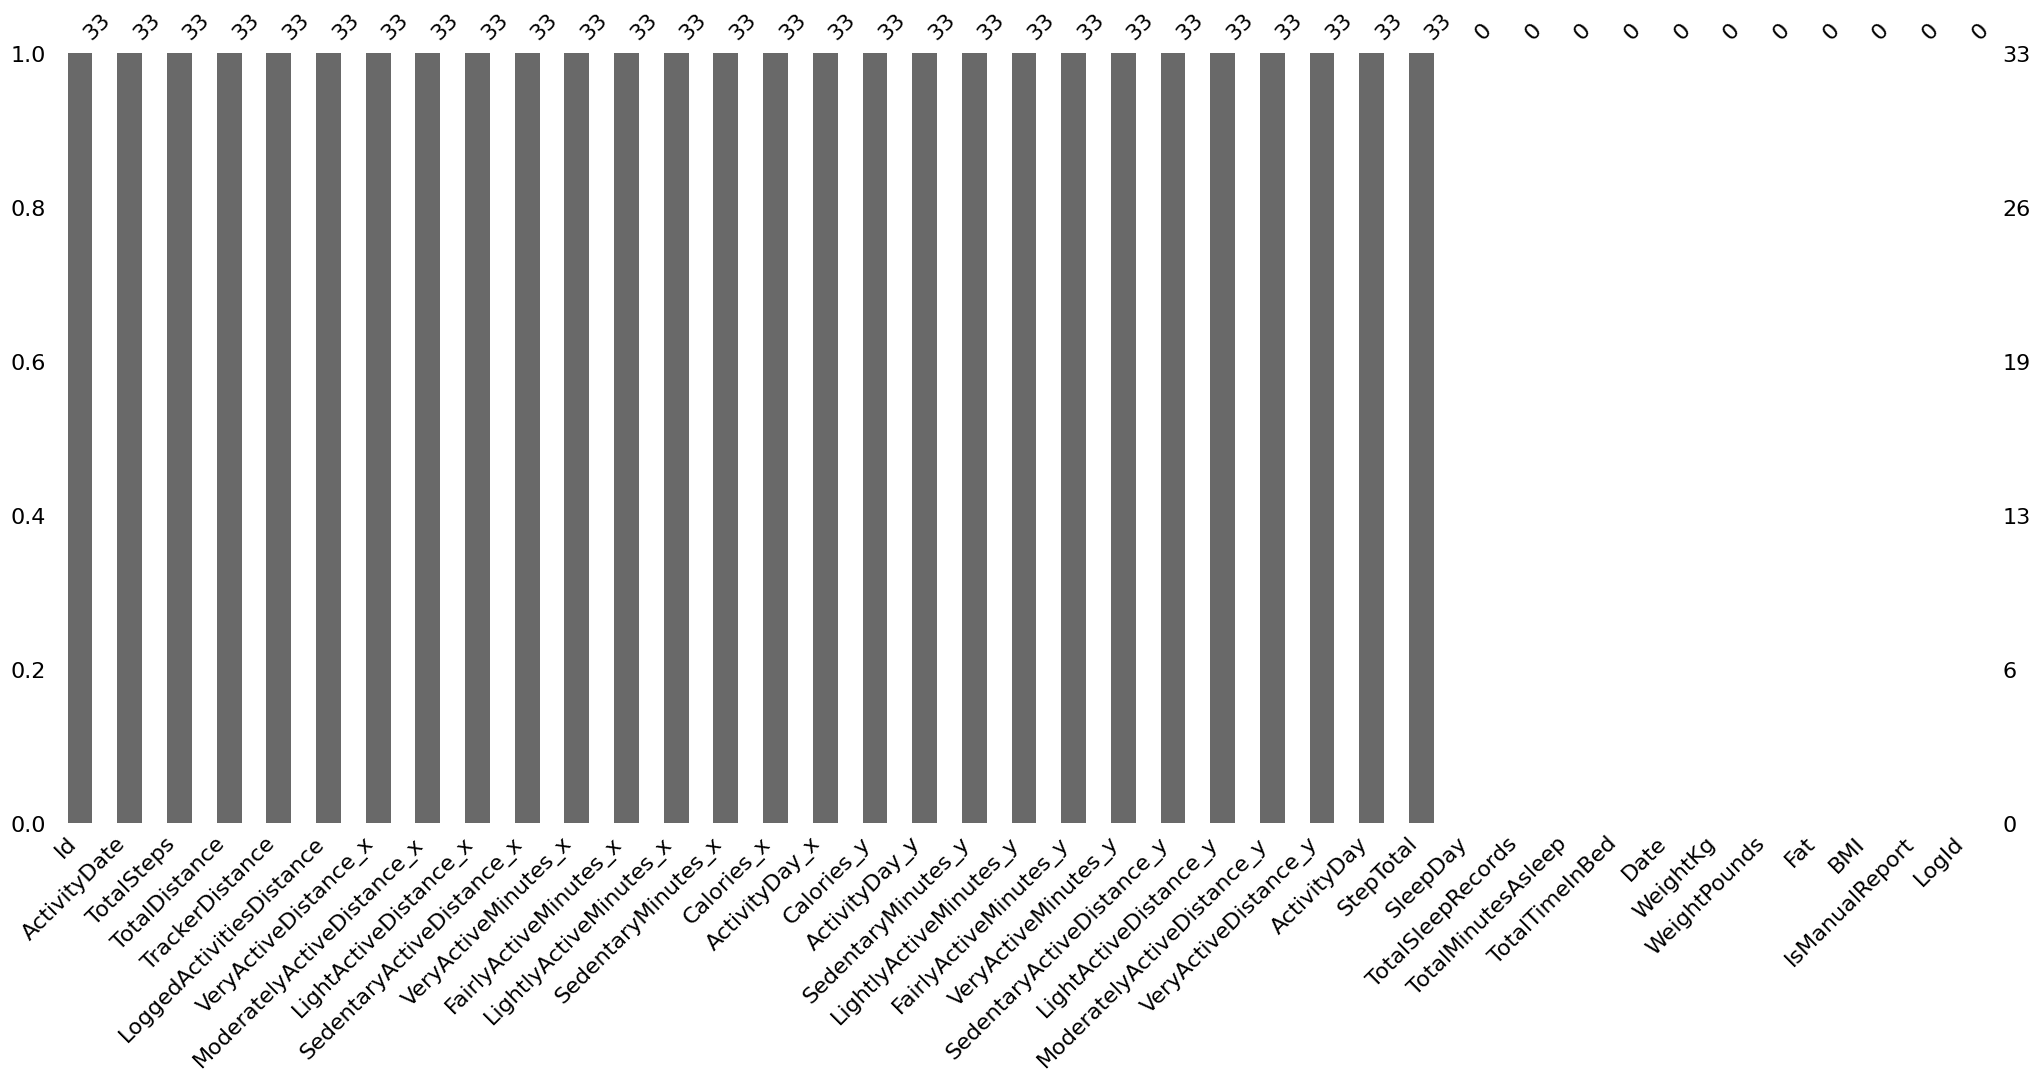

In [11]:
# Visualizing the missing values
ms.bar(md)
plt.show()

### What did you know about your dataset?

**The Following things which are about the dataset:-**

1) There are 1004 rows and 6 duplicate rows.
2) There are 39 columns.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
md.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance_x',
       'ModeratelyActiveDistance_x', 'LightActiveDistance_x',
       'SedentaryActiveDistance_x', 'VeryActiveMinutes_x',
       'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'SedentaryMinutes_x',
       'Calories_x', 'ActivityDay_x', 'Calories_y', 'ActivityDay_y',
       'SedentaryMinutes_y', 'LightlyActiveMinutes_y', 'FairlyActiveMinutes_y',
       'VeryActiveMinutes_y', 'SedentaryActiveDistance_y',
       'LightActiveDistance_y', 'ModeratelyActiveDistance_y',
       'VeryActiveDistance_y', 'ActivityDay', 'StepTotal', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Date',
       'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId'],
      dtype='object')

In [13]:
# Dataset Describe
md.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,...,VeryActiveDistance_y,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId
count,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,...,33.000000,33.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.857201e+09,8236.848485,5.982727,5.958182,0.215844,1.826364,0.346061,3.41000,0.000303,22.303030,...,1.826364,8236.848485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.433765e+09,4873.667582,3.961760,3.936669,0.922865,3.105690,0.471420,2.06639,0.001741,31.597552,...,3.105690,4873.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.347168e+09,5014.000000,3.450000,3.450000,0.000000,0.000000,0.000000,2.10000,0.000000,0.000000,...,0.000000,5014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.445115e+09,8163.000000,5.980000,5.980000,0.000000,0.140000,0.240000,3.45000,0.000000,2.000000,...,0.140000,8163.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.962181e+09,10694.000000,7.570000,7.570000,0.000000,3.060000,0.550000,5.31000,0.000000,42.000000,...,3.060000,10694.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.877689e+09,23186.000000,20.400000,20.400000,4.869783,12.220000,2.300000,7.82000,0.010000,116.000000,...,12.220000,23186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

**The following is the description for the variables:-**

**Columns----------------------------------Description**

1) Id----------------------------------Unique ID. 
2) ActivityDate----------------------------------Date of the activity.
3) TotalSteps----------------------------------Total Steps done by the user.
4) TotalDistance----------------------------------Total Distance covered by the user.
5) TrackerDistance----------------------------------Tracked Distance by the user.
6) LoggedActivitiesDistance----------------------------------Logged activity distance on the app.
7) VeryActiveDistance_x----------------------------------X coordinatinate for very active distance.
8) ModeratelyActiveDistance_x----------------------------------X coordinatinate for moderate active distance.
9) LightActiveDistance_x----------------------------------X coordinatinate for light active distance.
10) SedentaryActiveDistance_x----------------------------------X coordinatinate for Sedentary active distance.
11) VeryActiveMinutes_x----------------------------------X coordinatinate for very active minutes.
12) FairlyActiveMinutes_x----------------------------------X coordinatinate for fairly active minutes.
13) LightlyActiveMinutes_x----------------------------------X coordinatinate for light active minutes.
14) SedentaryMinutes_x----------------------------------X coordinatinate for Sedentary active minutes.
15) Calories_x----------------------------------X coordinatinate for calories.
16) ActivityDay_x----------------------------------X coordinatinate for activity date.
17) Calories_y----------------------------------y coordinatinate for calories.
18) ActivityDay_y----------------------------------y coordinatinate for activity date.
19) SedentaryMinutes_y----------------------------------y coordinatinate for Sedentary active minutes.
20) LightlyActiveMinutes_y----------------------------------y coordinatinate for light active minutes.
21) FairlyActiveMinutes_y----------------------------------y coordinatinate for fairly active minutes.
22) VeryActiveMinutes_y----------------------------------y coordinatinate for very active minutes.
23) SedentaryActiveDistance_y----------------------------------y coordinatinate for Sedentary active distance.
24) LightActiveDistance_y----------------------------------y coordinatinate for light active distance.
25) ModeratelyActiveDistance_y----------------------------------y coordinatinate for moderate active distance. 
26) VeryActiveDistance_y----------------------------------y coordinatinate for very active distance.
27) ActivityDay----------------------------------Day of the activity.
28) StepTotal----------------------------------Step count.
29) SleepDay----------------------------------Total sleep count.
30) TotalSleepRecords----------------------------------Sleep record for user.
31) TotalMinutesAsleep----------------------------------Total minutes the user was asleep.
32) TotalTimeInBed----------------------------------Total time user was in bed.
33) Date----------------------------------Date of record.
34) WeightKg----------------------------------Weight of user in KG's.
35) WeightPounds----------------------------------Weight of user in Pounds.
36) Fat----------------------------------Fat percentage of user.
37) BMI----------------------------------Body mass index of user.
38) IsManualReport----------------------------------Manual report of user.
39) LogId----------------------------------Login ID for the user.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for x in md.columns:
    print(f"{x} - {md[x].nunique()}") 

Id - 33
ActivityDate - 1
TotalSteps - 32
TotalDistance - 32
TrackerDistance - 32
LoggedActivitiesDistance - 3
VeryActiveDistance_x - 19
ModeratelyActiveDistance_x - 19
LightActiveDistance_x - 27
SedentaryActiveDistance_x - 2
VeryActiveMinutes_x - 18
FairlyActiveMinutes_x - 13
LightlyActiveMinutes_x - 29
SedentaryMinutes_x - 29
Calories_x - 32
ActivityDay_x - 1
Calories_y - 32
ActivityDay_y - 1
SedentaryMinutes_y - 29
LightlyActiveMinutes_y - 29
FairlyActiveMinutes_y - 13
VeryActiveMinutes_y - 18
SedentaryActiveDistance_y - 2
LightActiveDistance_y - 27
ModeratelyActiveDistance_y - 19
VeryActiveDistance_y - 19
ActivityDay - 1
StepTotal - 32
SleepDay - 0
TotalSleepRecords - 0
TotalMinutesAsleep - 0
TotalTimeInBed - 0
Date - 0
WeightKg - 0
WeightPounds - 0
Fat - 0
BMI - 0
IsManualReport - 0
LogId - 0


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
md.isnull().sum()

Id                             0
ActivityDate                   0
TotalSteps                     0
TotalDistance                  0
TrackerDistance                0
LoggedActivitiesDistance       0
VeryActiveDistance_x           0
ModeratelyActiveDistance_x     0
LightActiveDistance_x          0
SedentaryActiveDistance_x      0
VeryActiveMinutes_x            0
FairlyActiveMinutes_x          0
LightlyActiveMinutes_x         0
SedentaryMinutes_x             0
Calories_x                     0
ActivityDay_x                  0
Calories_y                     0
ActivityDay_y                  0
SedentaryMinutes_y             0
LightlyActiveMinutes_y         0
FairlyActiveMinutes_y          0
VeryActiveMinutes_y            0
SedentaryActiveDistance_y      0
LightActiveDistance_y          0
ModeratelyActiveDistance_y     0
VeryActiveDistance_y           0
ActivityDay                    0
StepTotal                      0
SleepDay                      33
TotalSleepRecords             33
TotalMinut

In [16]:
md.fillna({'SleepDay': 0},inplace=True)

C:\Users\ojadh\AppData\Local\Temp\ipykernel_10448\1228238875.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  md.fillna({'SleepDay': 0},inplace=True)


In [17]:
md.fillna({'TotalSleepRecords': 0},inplace=True)

In [18]:
md.fillna({'TotalMinutesAsleep': 0},inplace=True)

In [19]:
md.fillna({'TotalTimeInBed': 0},inplace=True)

In [20]:
md['Date'] = md['Date'].fillna('Missing')

In [21]:
md.fillna({'WeightKg': 0},inplace=True)

In [22]:
md.fillna({'WeightPounds': 0},inplace=True)

In [23]:
md.fillna({'Fat': 0},inplace=True)

In [24]:
md.fillna({'BMI': 0},inplace=True)

In [25]:
md.fillna({'IsManualReport': "Missing"},inplace=True)

In [26]:
md.fillna({'LogId': 0},inplace=True)

In [27]:
md.isnull().sum()

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance_x          0
ModeratelyActiveDistance_x    0
LightActiveDistance_x         0
SedentaryActiveDistance_x     0
VeryActiveMinutes_x           0
FairlyActiveMinutes_x         0
LightlyActiveMinutes_x        0
SedentaryMinutes_x            0
Calories_x                    0
ActivityDay_x                 0
Calories_y                    0
ActivityDay_y                 0
SedentaryMinutes_y            0
LightlyActiveMinutes_y        0
FairlyActiveMinutes_y         0
VeryActiveMinutes_y           0
SedentaryActiveDistance_y     0
LightActiveDistance_y         0
ModeratelyActiveDistance_y    0
VeryActiveDistance_y          0
ActivityDay                   0
StepTotal                     0
SleepDay                      0
TotalSleepRecords             0
TotalMinutesAsleep            0
TotalTim

### What all manipulations have you done and insights you found?

**The following Manipulations have been done on dataset:-**

1) Removed 6 duplicate rows.
2) Replaced all the missing values in the columns with numerical value 0.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

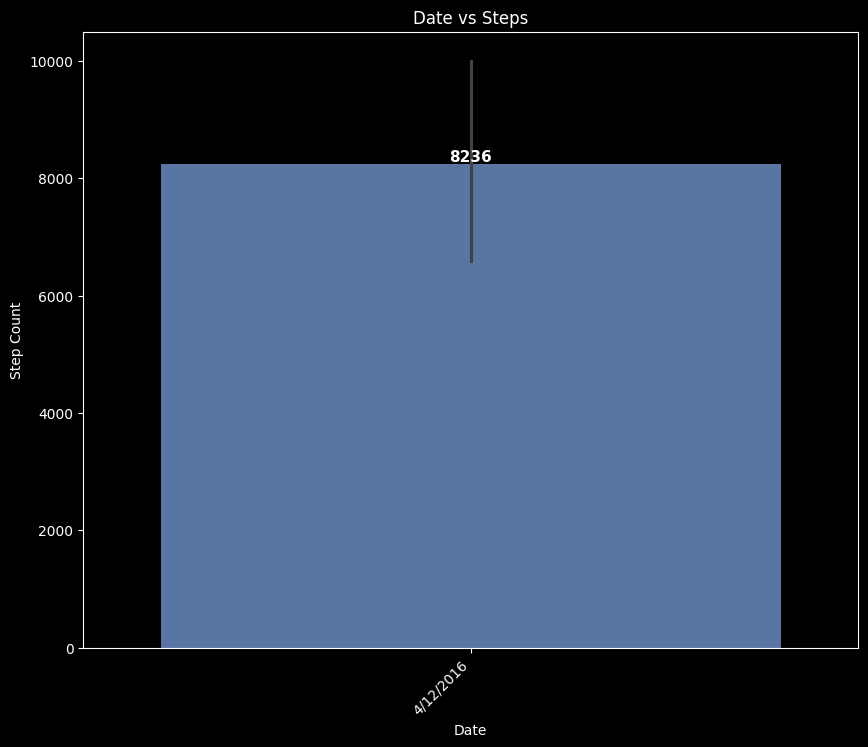

In [28]:
# Chart - 1 visualization code
plt.style.use('dark_background')

# Create a bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size
ax = sns.barplot(data=md, x="ActivityDate", y="TotalSteps", hue="ActivityDate", palette="deep", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Date")
plt.ylabel("Step Count")
plt.title("Date vs Steps")
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',  
        fontweight='bold'
    )

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The above bar plot gives clear count in vertical visual.

##### 2. What is/are the insight(s) found from the chart?

The Count total steps for the activity date is 8236

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The people are consistent with working out specially walking and reaching their step goals.

#### Chart - 2

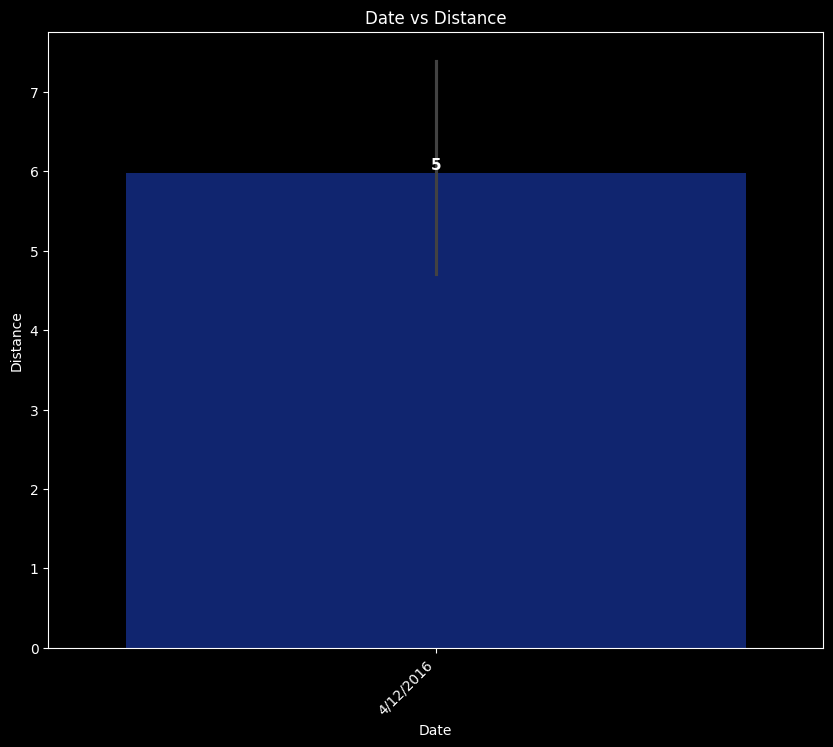

In [29]:
# Chart - 2 visualization code
plt.style.use('dark_background')

# Create a bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size
ax = sns.barplot(data=md, x="ActivityDate", y="TotalDistance", hue="ActivityDate", palette="dark", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Date vs Distance")
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',  
        fontweight='bold'
    )

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This gives clear distance count for the date.

##### 2. What is/are the insight(s) found from the chart?

The count of distance is 5 KM for the activity date.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that people are consistent in covering required distance but can improve it by increasing the target for achieveing better results.

#### Chart - 3

In [30]:
# Chart - 3 visualization code
plt.style.use('dark_background')

md.columns = md.columns.str.strip()

# Count occurrences of each start station
step_count = md["TotalSteps"].value_counts().reset_index()
step_count.columns = ["TotalSteps", "Count"]

# Create the treemap
fig = px.treemap(step_count, 
                 path=['TotalSteps'], 
                 values='Count', 
                 title="Count for Total Steps",
                 color='Count', 
                 color_continuous_scale="RdBu")

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This tree map gives good visual representation with count showing capabilities when we hover over each tile.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights:-

1) The label id 0 has 2 count.
2) The label id 2564 has 1 count.
3) All other label has also 1-1 each count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should be encouraged to set higher step goals so that they can achieve their fitness goals faster , for this strava app can organise online/offline fitness challenges or awareness campaigns to provke its users to set high targets to achieve fitness goals faster.

#### Chart - 4

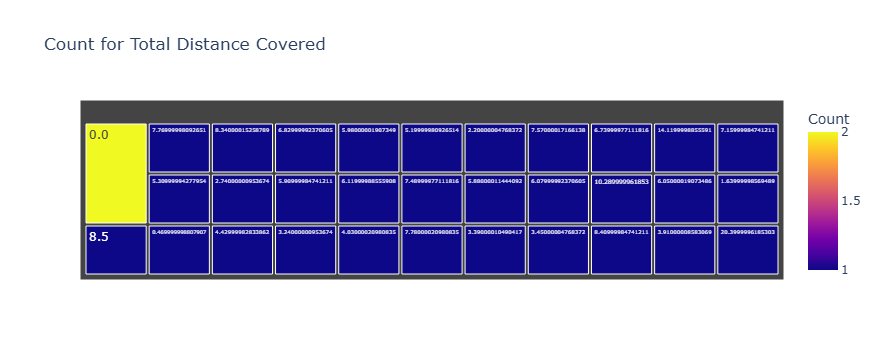

In [31]:
# Chart - 4 visualization code
plt.style.use('dark_background')

md.columns = md.columns.str.strip()

# Count occurrences of each start station
distance_count = md["TotalDistance"].value_counts().reset_index()
distance_count.columns = ["TotalDistance", "Count"]

# Create the treemap
fig = px.treemap(distance_count, 
                 path=['TotalDistance'], 
                 values='Count', 
                 title="Count for Total Distance Covered",
                 color='Count', 
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This tree map gives good visual representation with count showing capabilities when we hover over each tile.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights:-

1) The label id 0 has 2 count.
2) The label id 1.639 has 1 count.
3) All other label has also 1-1 each count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should be encouraged to set higher step goals so that they can achieve their fitness goals faster , for this strava app can organise online/offline fitness challenges or awareness campaigns to provke its users to set high targets to achieve fitness goals faster.

#### Chart - 5

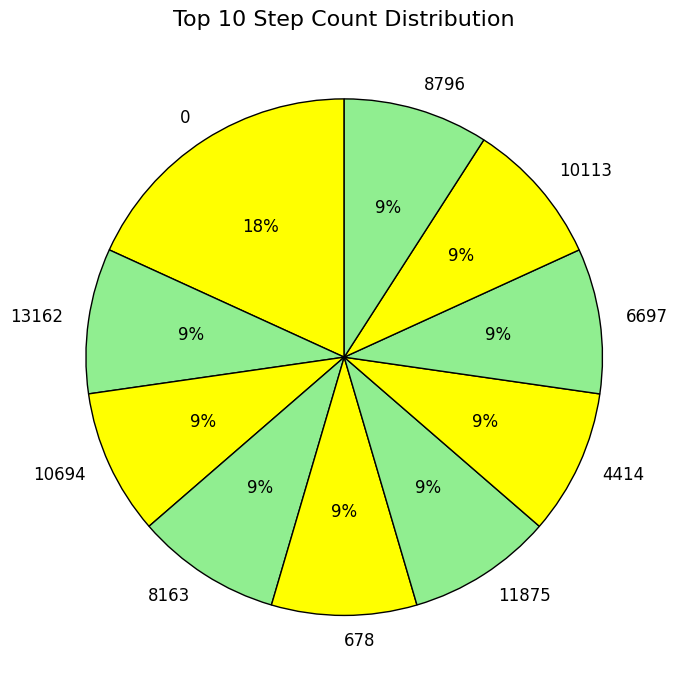

In [32]:
# Chart - 5 visualization code
plt.style.use('default')
md.columns = md.columns.str.strip()

co = md['StepTotal'].value_counts().head(10)
co.index = co.index.astype(int)  # <- make the year labels integers

plt.figure(figsize=(15, 7))
co.plot(
    kind='pie',
    labels=[str(year) for year in co.index],  # <- use labels explicitly
    autopct=lambda p: '{:.0f}%'.format(p),  # whole numbers, no decimal
    colors=['yellow', 'lightgreen'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Top 10 Step Count Distribution', fontsize=16)
plt.ylabel('') 
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart are amazing way to express or visualize the dataset in proper way.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above pie chart:-

1) Maximum Step count distribution is for ID 0 with 18% distribution.
2) Second highest is for ID 14172 with 9% distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should be encouraged to set higher step goals so that they can achieve their fitness goals faster , for this strava app can organise online/offline fitness challenges or awareness campaigns to provke its users to set high targets to achieve fitness goals faster.

#### Chart - 6

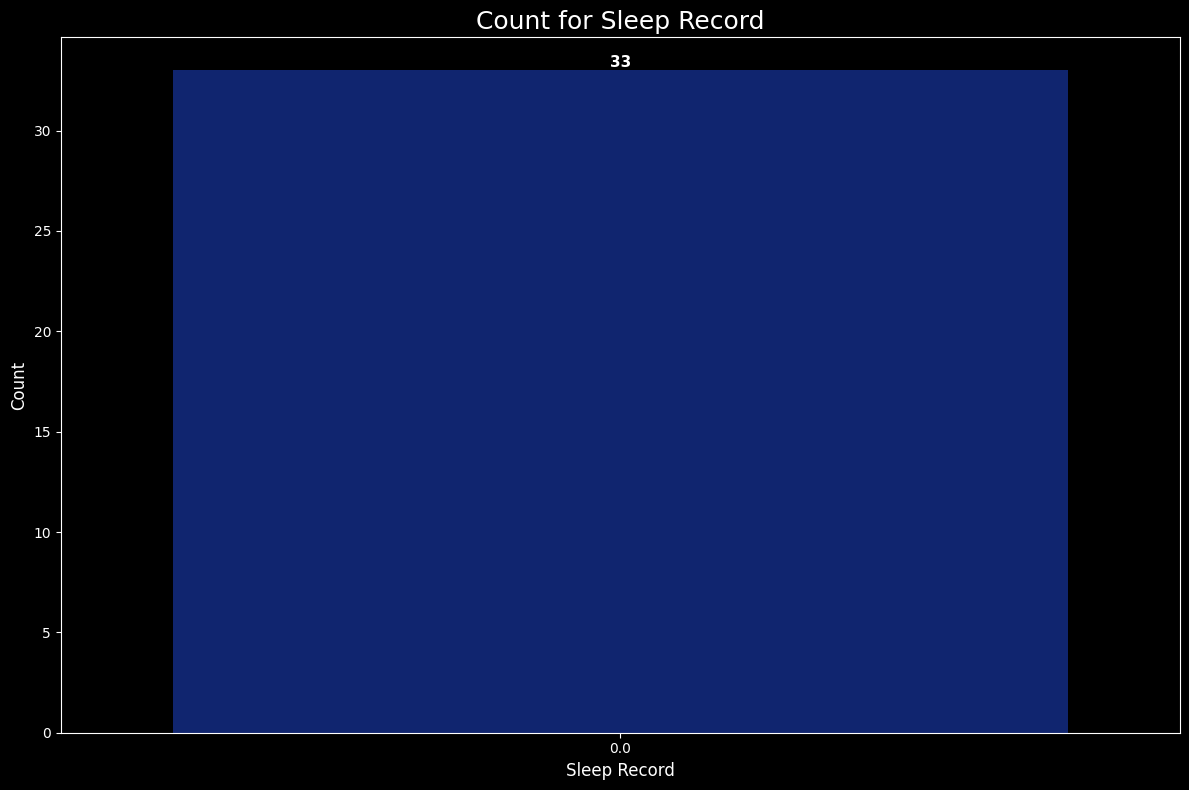

In [33]:
# Chart - 6 visualization code
plt.style.use('dark_background')

md.columns = md.columns.str.strip()
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='TotalSleepRecords', data=md, hue="TotalSleepRecords", palette="dark", legend=0)
plt.title('Count for Sleep Record', fontsize=18)
plt.xlabel('Sleep Record', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',  
        fontweight='bold'
    )

plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot/ chart is great for showing count.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-

1) Count for sleep record is 33. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights show that the count is very less for sleep record means strava should encourage the people to take better sleep by doing exercise and regualar workout sessions.

#### Chart - 7

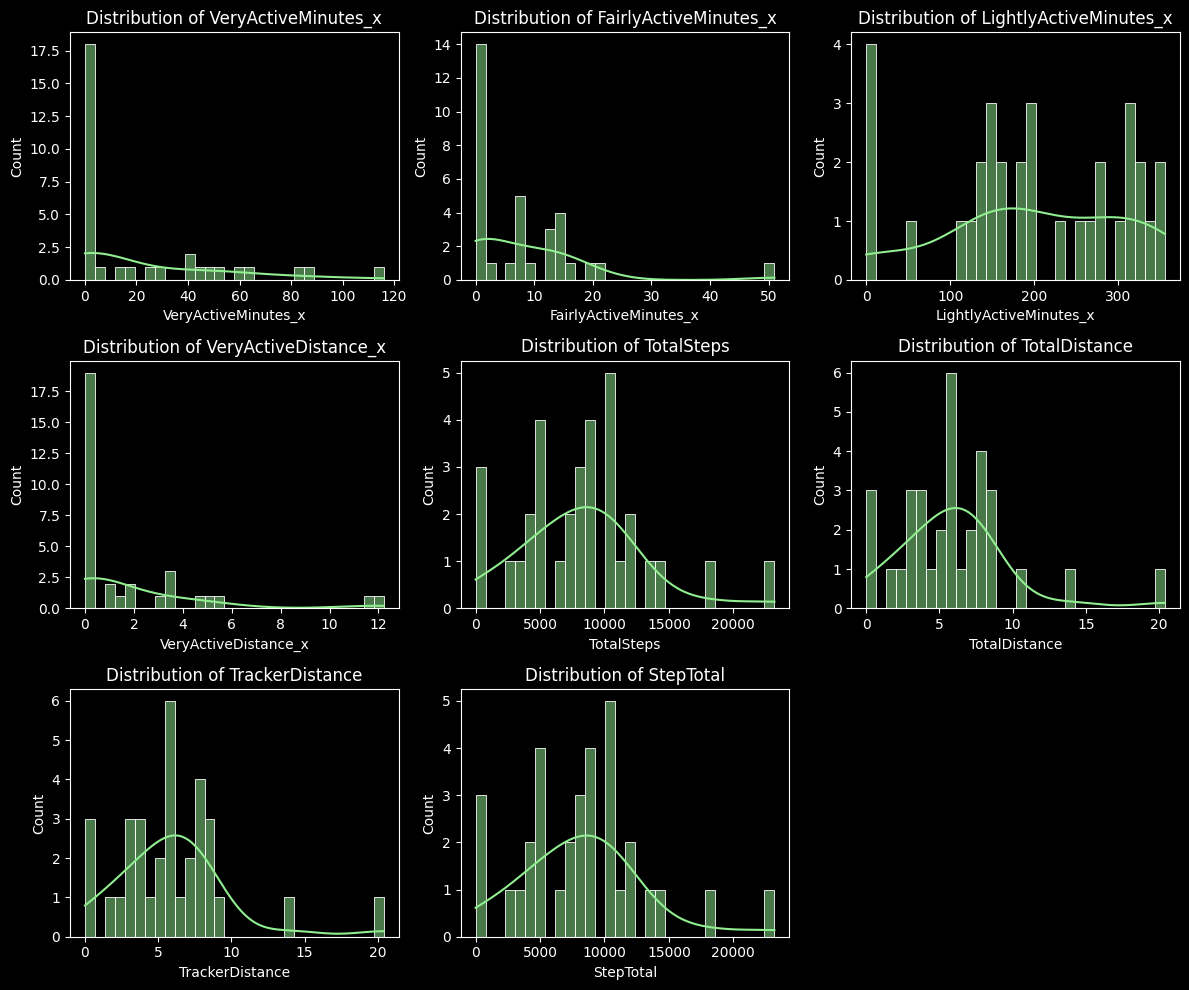

In [34]:
# Chart - 7 visualization code
plt.style.use('dark_background')


numerical_features = ['VeryActiveMinutes_x','FairlyActiveMinutes_x','LightlyActiveMinutes_x','VeryActiveDistance_x',
                     'TotalSteps','TotalDistance','TrackerDistance','StepTotal']

plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(md[column], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribution of {column}', color='white')
    plt.xlabel(column, color='white')
    plt.ylabel('Count', color='white')
    
    
    plt.grid(False)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above chart is better for comparing numerical data types with each other and itself.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-

1) Tracker distance highest count is 6.
2) Highest count for total steps is 5.
3) Highest count for very active minutes x is 17.5.
4) Highest count for fairly active minutes x is 14.
5) Highest count for lightly active minutes x is 4.
6) Highest count for Very active distance x is 18.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From above insights we can conclude that the strava app monitor on these parameters as they are well achieved by the user but surely there is hope for improvement.

#### Chart - 8

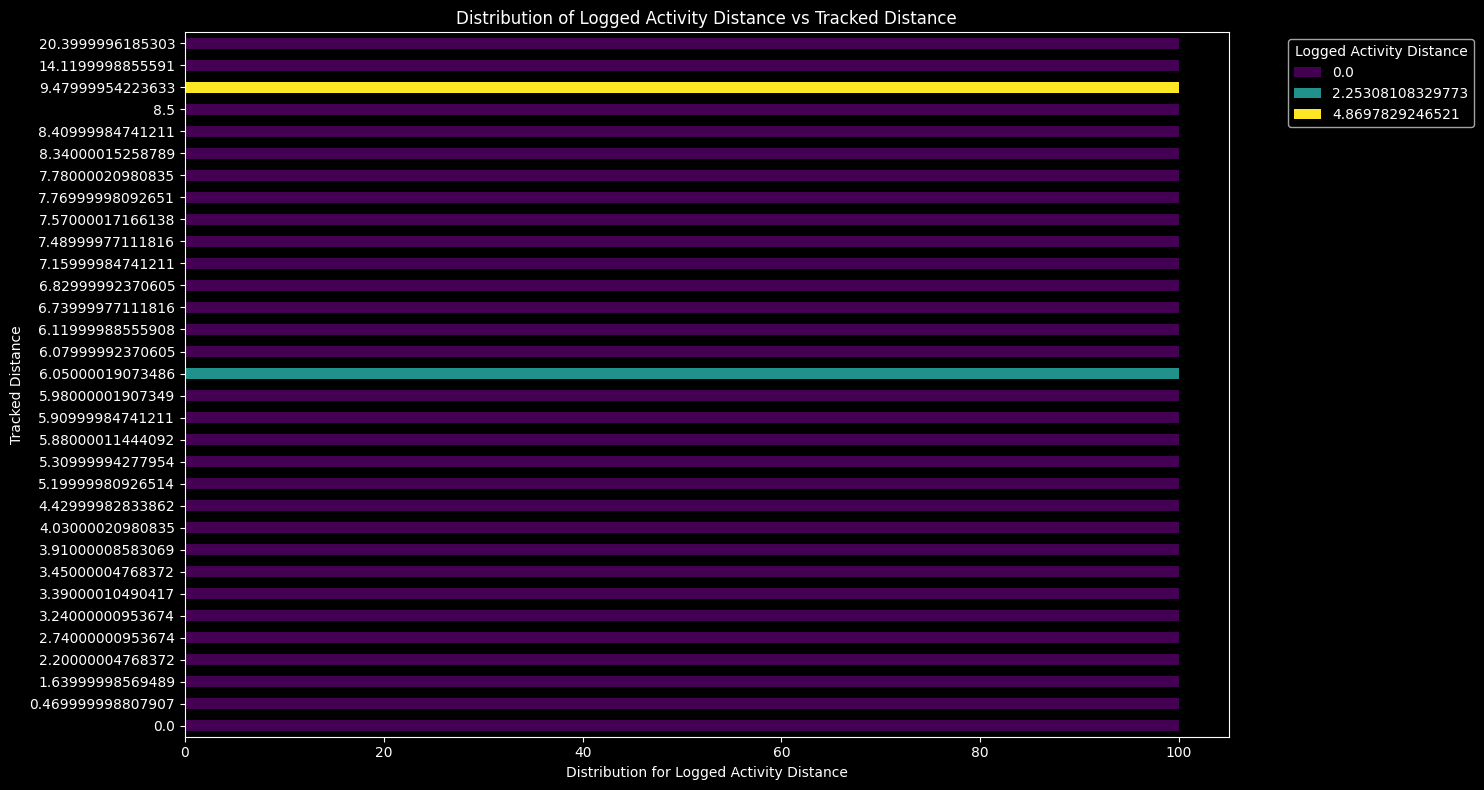

In [35]:
# Chart - 8 visualization code
data = md.groupby(["TrackerDistance", "LoggedActivitiesDistance"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_1 = data.div(data.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
data_1.plot(kind="barh", stacked=True, colormap="viridis", ax=ax)

# Labels and title
plt.xlabel("Distribution for Logged Activity Distance")
plt.ylabel("Tracked Distance")
plt.title("Distribution of Logged Activity Distance vs Tracked Distance")
plt.legend(title="Logged Activity Distance", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above multi distribution bar chart is useful for showing various entities distribution for single variable value.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-

1) For 6.05 Tracked distance the entire distribution is distributed for 2.25 logged activity distance.
2) For 9.47 Tracked distance the entire distribution is distributed for 4.86 logged activity distance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart shows that the tracked distance is significantly low as per standard goals, strava can help its users achieve better targets by spreading awareness about fitness and rewarding them if they complete their certain targets.

#### Chart - 9

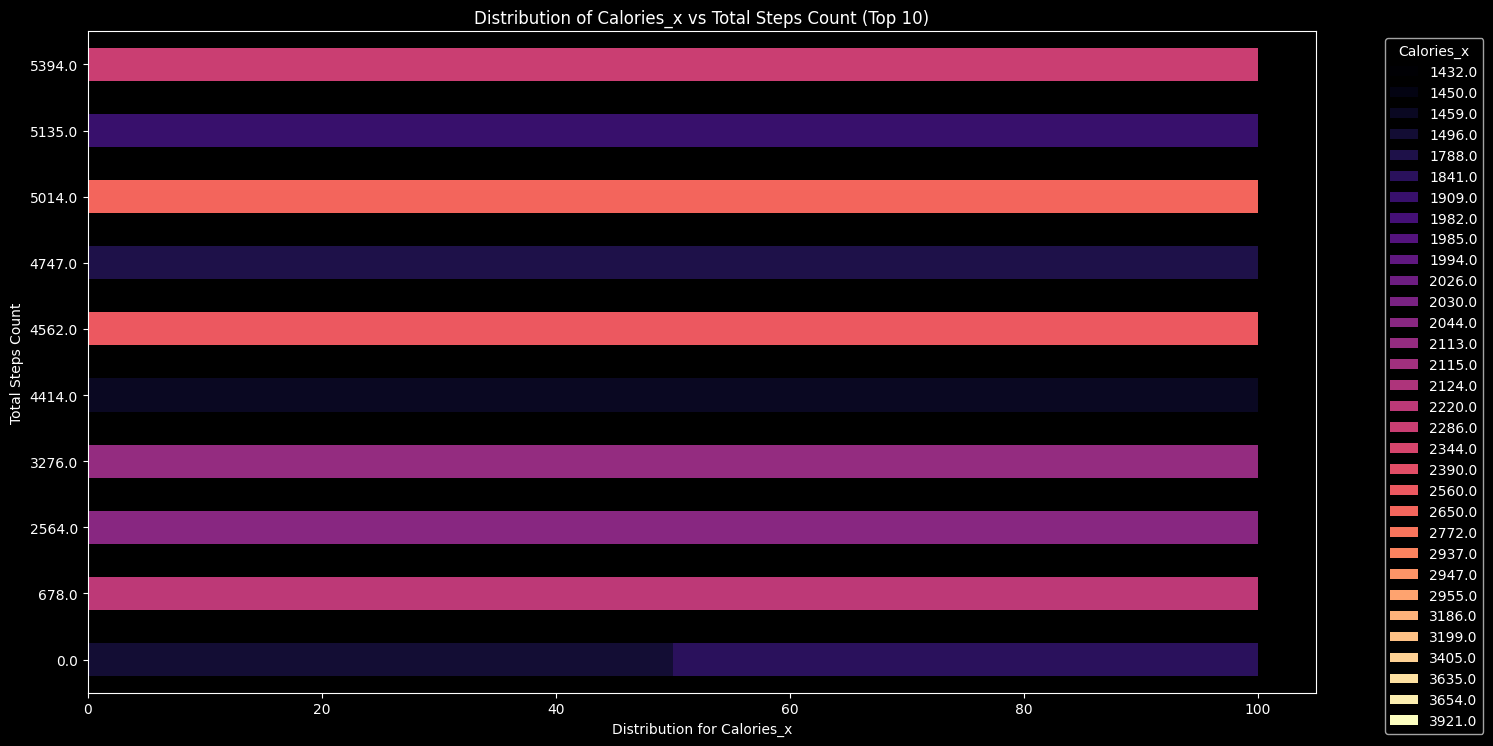

In [36]:
# Chart - 9 visualization code
plt.style.use('dark_background')

data_cx = md.groupby(["TotalSteps", "Calories_x"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_cx1 = data_cx.div(data_cx.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
TotalSteps_1 = data_cx.sum(axis=1).sort_values(ascending=False).head(10).index
TotalSteps_cx = data_cx1.loc[TotalSteps_1]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
TotalSteps_cx.plot(kind="barh", stacked=True, colormap="magma", ax=ax)

# Labels and title
plt.xlabel("Distribution for Calories_x")
plt.ylabel("Total Steps Count")
plt.title("Distribution of Calories_x vs Total Steps Count (Top 10)")
plt.legend(title="Calories_x", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above multi distribution bar chart is useful for showing various entities distribution for single variable value.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-

1) Every step count has distribution of single entity for its whole distribution except for 0 step count.
2) For 0 step count 50% distribution is for calories_x 1496 and other 50% distribution for 1909 calories_x.
3) For step count 678 the whole distribution is distributed for 2390 calories_x.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The calories which are burned by user has great distribution for steps they have completed, strava can use this data and apply in their campaign ideas for spreading awareness about both fitness and app.

#### Chart - 10

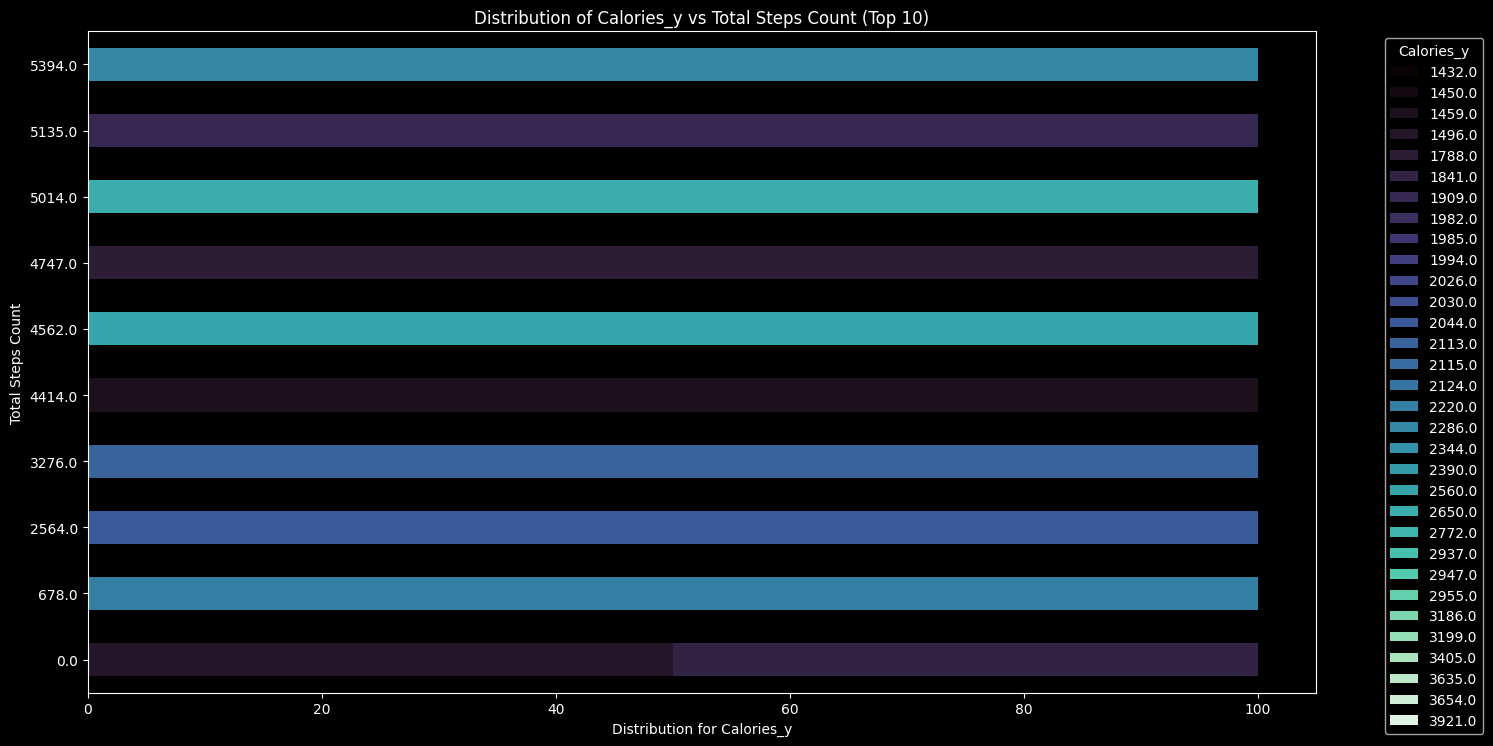

In [37]:
# Chart - 10 visualization code
plt.style.use('dark_background')

data_cy = md.groupby(["TotalSteps", "Calories_y"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_cy1 = data_cy.div(data_cy.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
TotalSteps_2 = data_cy.sum(axis=1).sort_values(ascending=False).head(10).index
TotalSteps_cy = data_cy1.loc[TotalSteps_2]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
TotalSteps_cy.plot(kind="barh", stacked=True, colormap="mako", ax=ax)

# Labels and title
plt.xlabel("Distribution for Calories_y")
plt.ylabel("Total Steps Count")
plt.title("Distribution of Calories_y vs Total Steps Count (Top 10)")
plt.legend(title="Calories_y", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above multi distribution bar chart is useful for showing various entities distribution for single variable value.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-

1) Every step count has distribution of single entity for its whole distribution except for 0 step count.
2) For 0 step count 50% distribution is for calories_y 1788 and other 50% distribution for 1982 calories_y.
3) For step count 678 the whole distribution is distributed for 2772 calories_y.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The calories which are burned by user has great distribution for steps they have completed, strava can use this data and apply in their campaign ideas for spreading awareness about both fitness and app.

#### Chart - 11

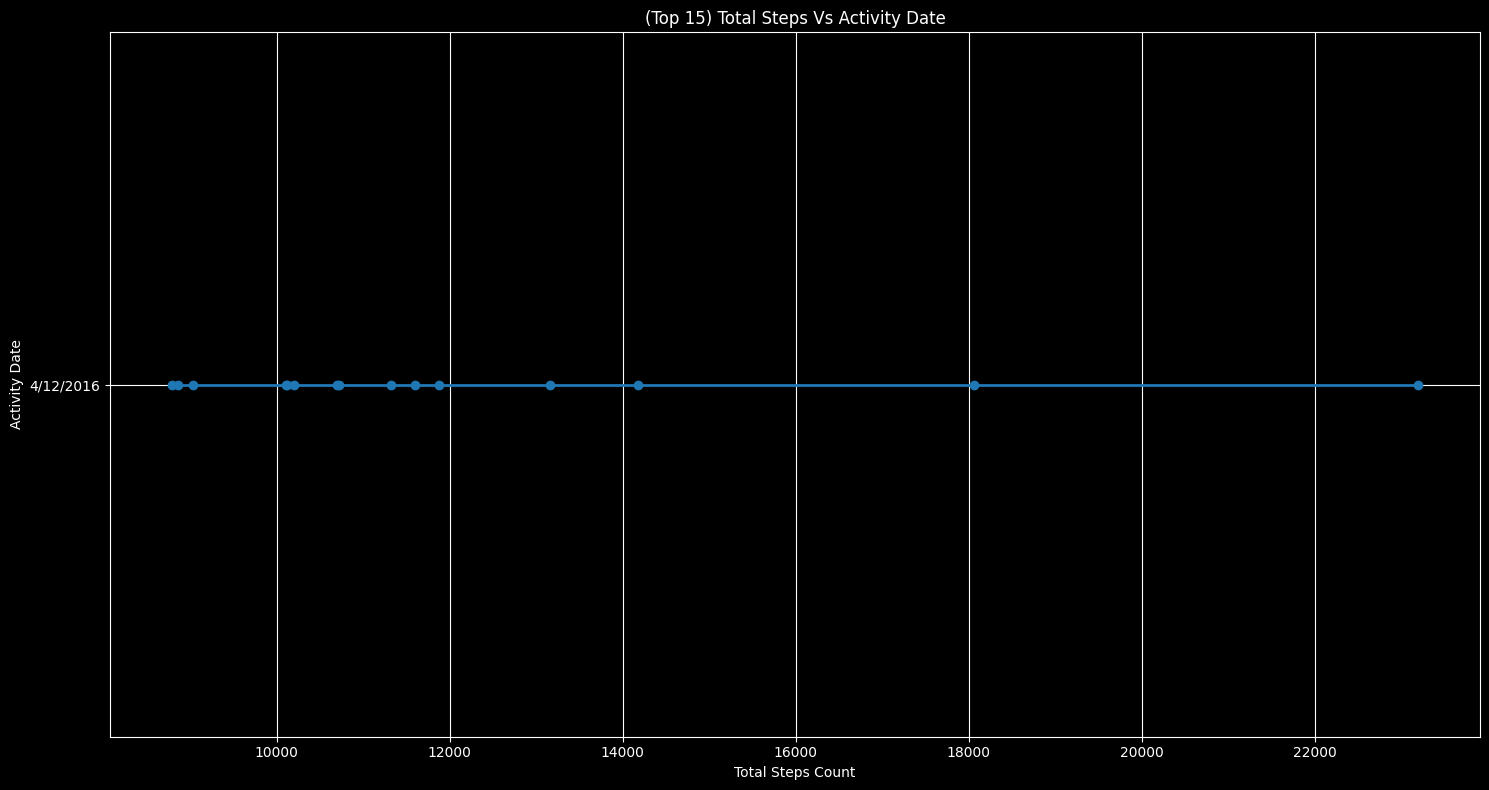

In [38]:
# Chart - 11 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_date_added = md[['TotalSteps', 'ActivityDate']].sort_values(by='TotalSteps', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_date_added['TotalSteps'], top_date_added['ActivityDate'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Total Steps Count")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Steps Vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The multi line chart distribution gives great trend analysis for any variable over a specific period of time.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for above multi-line chart:-

1) The above chart shows constant stagnant growth for Total steps by activity date.
2) The most congession of distribution of total steps for activity date is between 0-14000 total steps count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that many people are completing target of almost 14000 total steps count,but for slight improvement and to get better results, strava app can encourage its users by organizing campaigns, webinars, awareness seminars or rewarding system if some user completes certain level of target helping them achieve their fitness target faster and also it will help in marketing strava app among users. 

#### Chart - 12

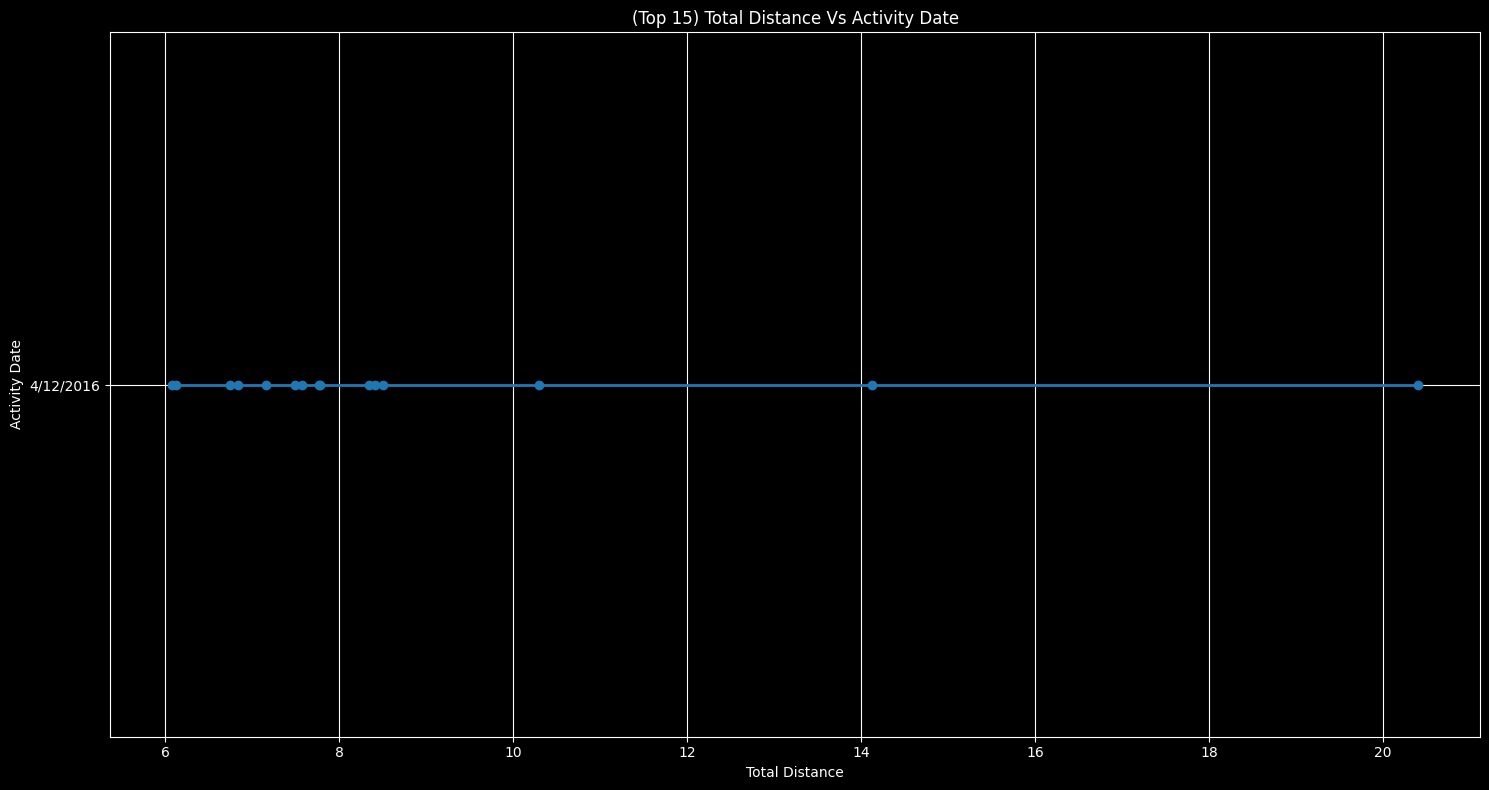

In [39]:
# Chart - 12 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_distance = md[['TotalDistance', 'ActivityDate']].sort_values(by='TotalDistance', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_distance['TotalDistance'], top_distance['ActivityDate'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Total Distance")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Distance Vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The multi line chart distribution gives great trend analysis for any variable over a specific period of time.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for above multi-line chart:-

1) The above chart shows constant stagnant growth for Total distance by activity date.
2) The most congession of distribution of total distance for activity date is between 6-10 total distance units.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that very few people are completing target of 10 or more total distance covered, for more and more people completing this target strava app can encourage its users by organizing campaigns, webinars, awareness seminars or rewarding system if some user completes certain level of target helping them achieve their fitness target faster and also it will help in marketing strava app among users. 

#### Chart - 13

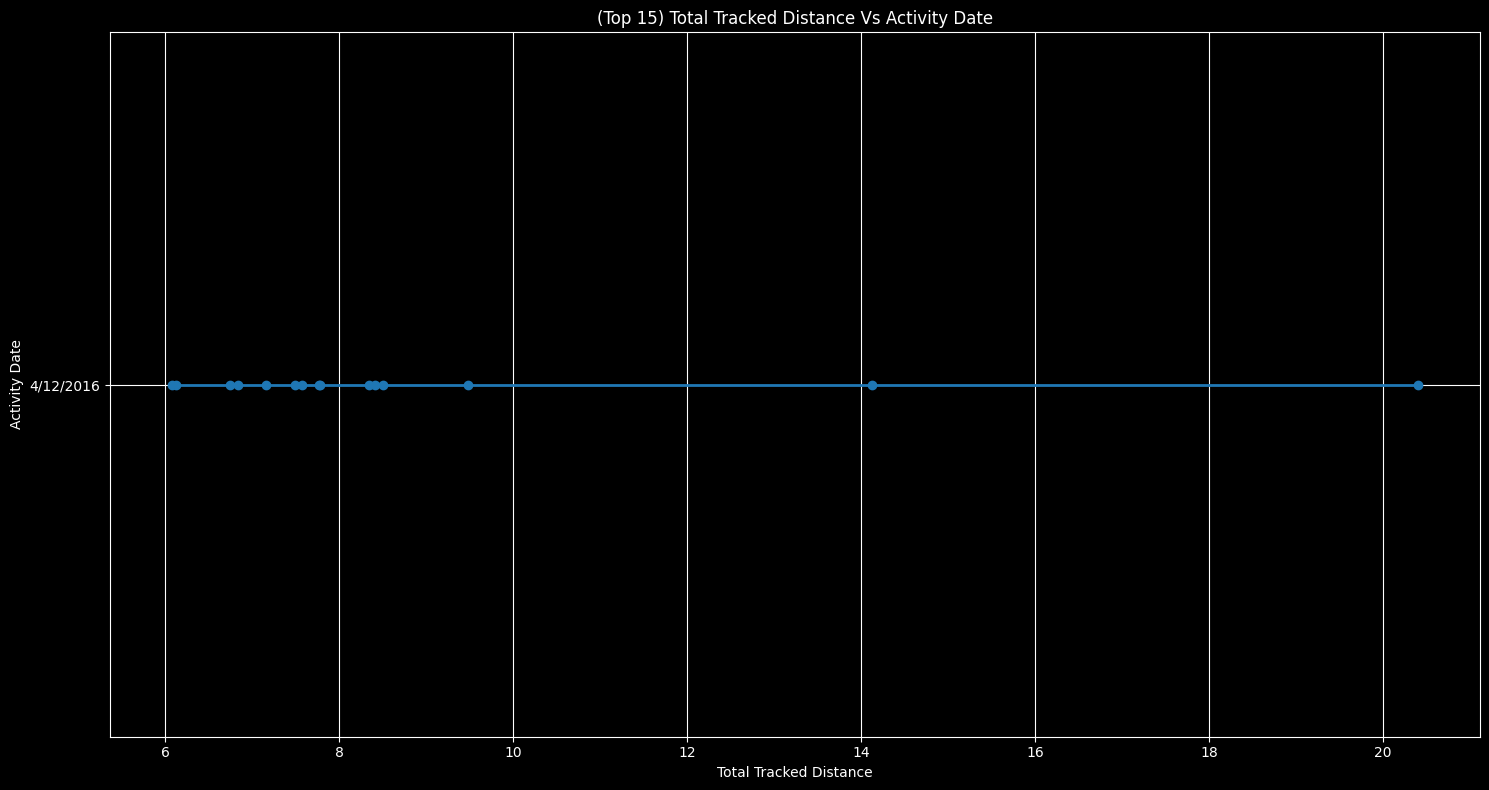

In [40]:
# Chart - 13 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_tracked = md[['TrackerDistance', 'ActivityDate']].sort_values(by='TrackerDistance', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_tracked['TrackerDistance'], top_tracked['ActivityDate'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Total Tracked Distance")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Tracked Distance Vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The multi line chart distribution gives great trend analysis for any variable over a specific period of time.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for above multi-line chart:-

1) The above chart shows constant stagnant growth for Total tracked distance by activity date.
2) The most congession of distribution of total distance for activity date is between 6-10 total tracked distance units.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that very few people are completing target of 10 or more total tracked distance covered, for more and more people completing this target strava app can encourage its users by organizing campaigns, webinars, awareness seminars or rewarding system if some user completes certain level of target helping them achieve their fitness target faster and also it will help in marketing strava app among users. 

#### Chart - 14 - Correlation Heatmap

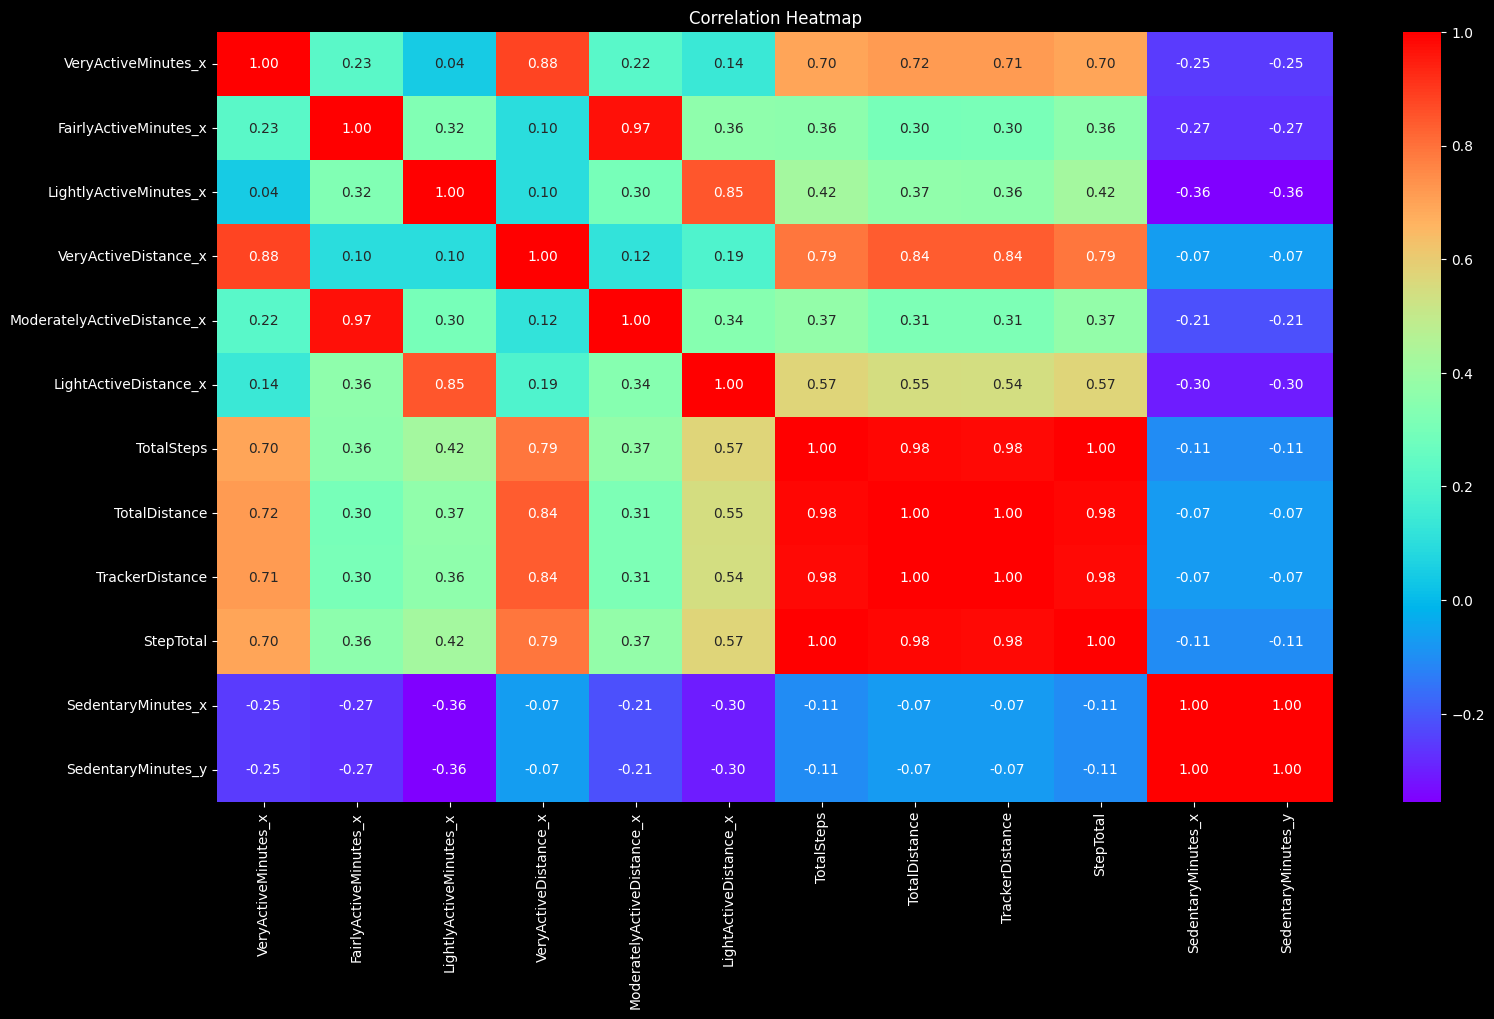

In [41]:
# Correlation Heatmap visualization code
columns_to_include = [
    'VeryActiveMinutes_x','FairlyActiveMinutes_x','LightlyActiveMinutes_x','VeryActiveDistance_x',
    'ModeratelyActiveDistance_x','LightActiveDistance_x','TotalSteps','TotalDistance','TrackerDistance',
    'StepTotal','SedentaryMinutes_x','SedentaryMinutes_y']

# Filter the DataFrame using column names
md2 = md[columns_to_include]

# Compute the correlation matrix
md3 = md2.corr()

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(md3, annot=True, cmap="rainbow", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap gives better correlation between various numerical variables in a single chart.

##### 2. What is/are the insight(s) found from the chart?

The Following are the insights for the above heatmap:-

1) The highest correlation is between Total distance and Total steps with value of 0.98.
2) Second highest correlation is between moderately active distance _x and Fairly active minutes _x with value of 0.97.
3) Third highest correlation is between Very active distance _x and very active minutes_x with value of 0.88.

#### Chart - 15 - Pair Plot

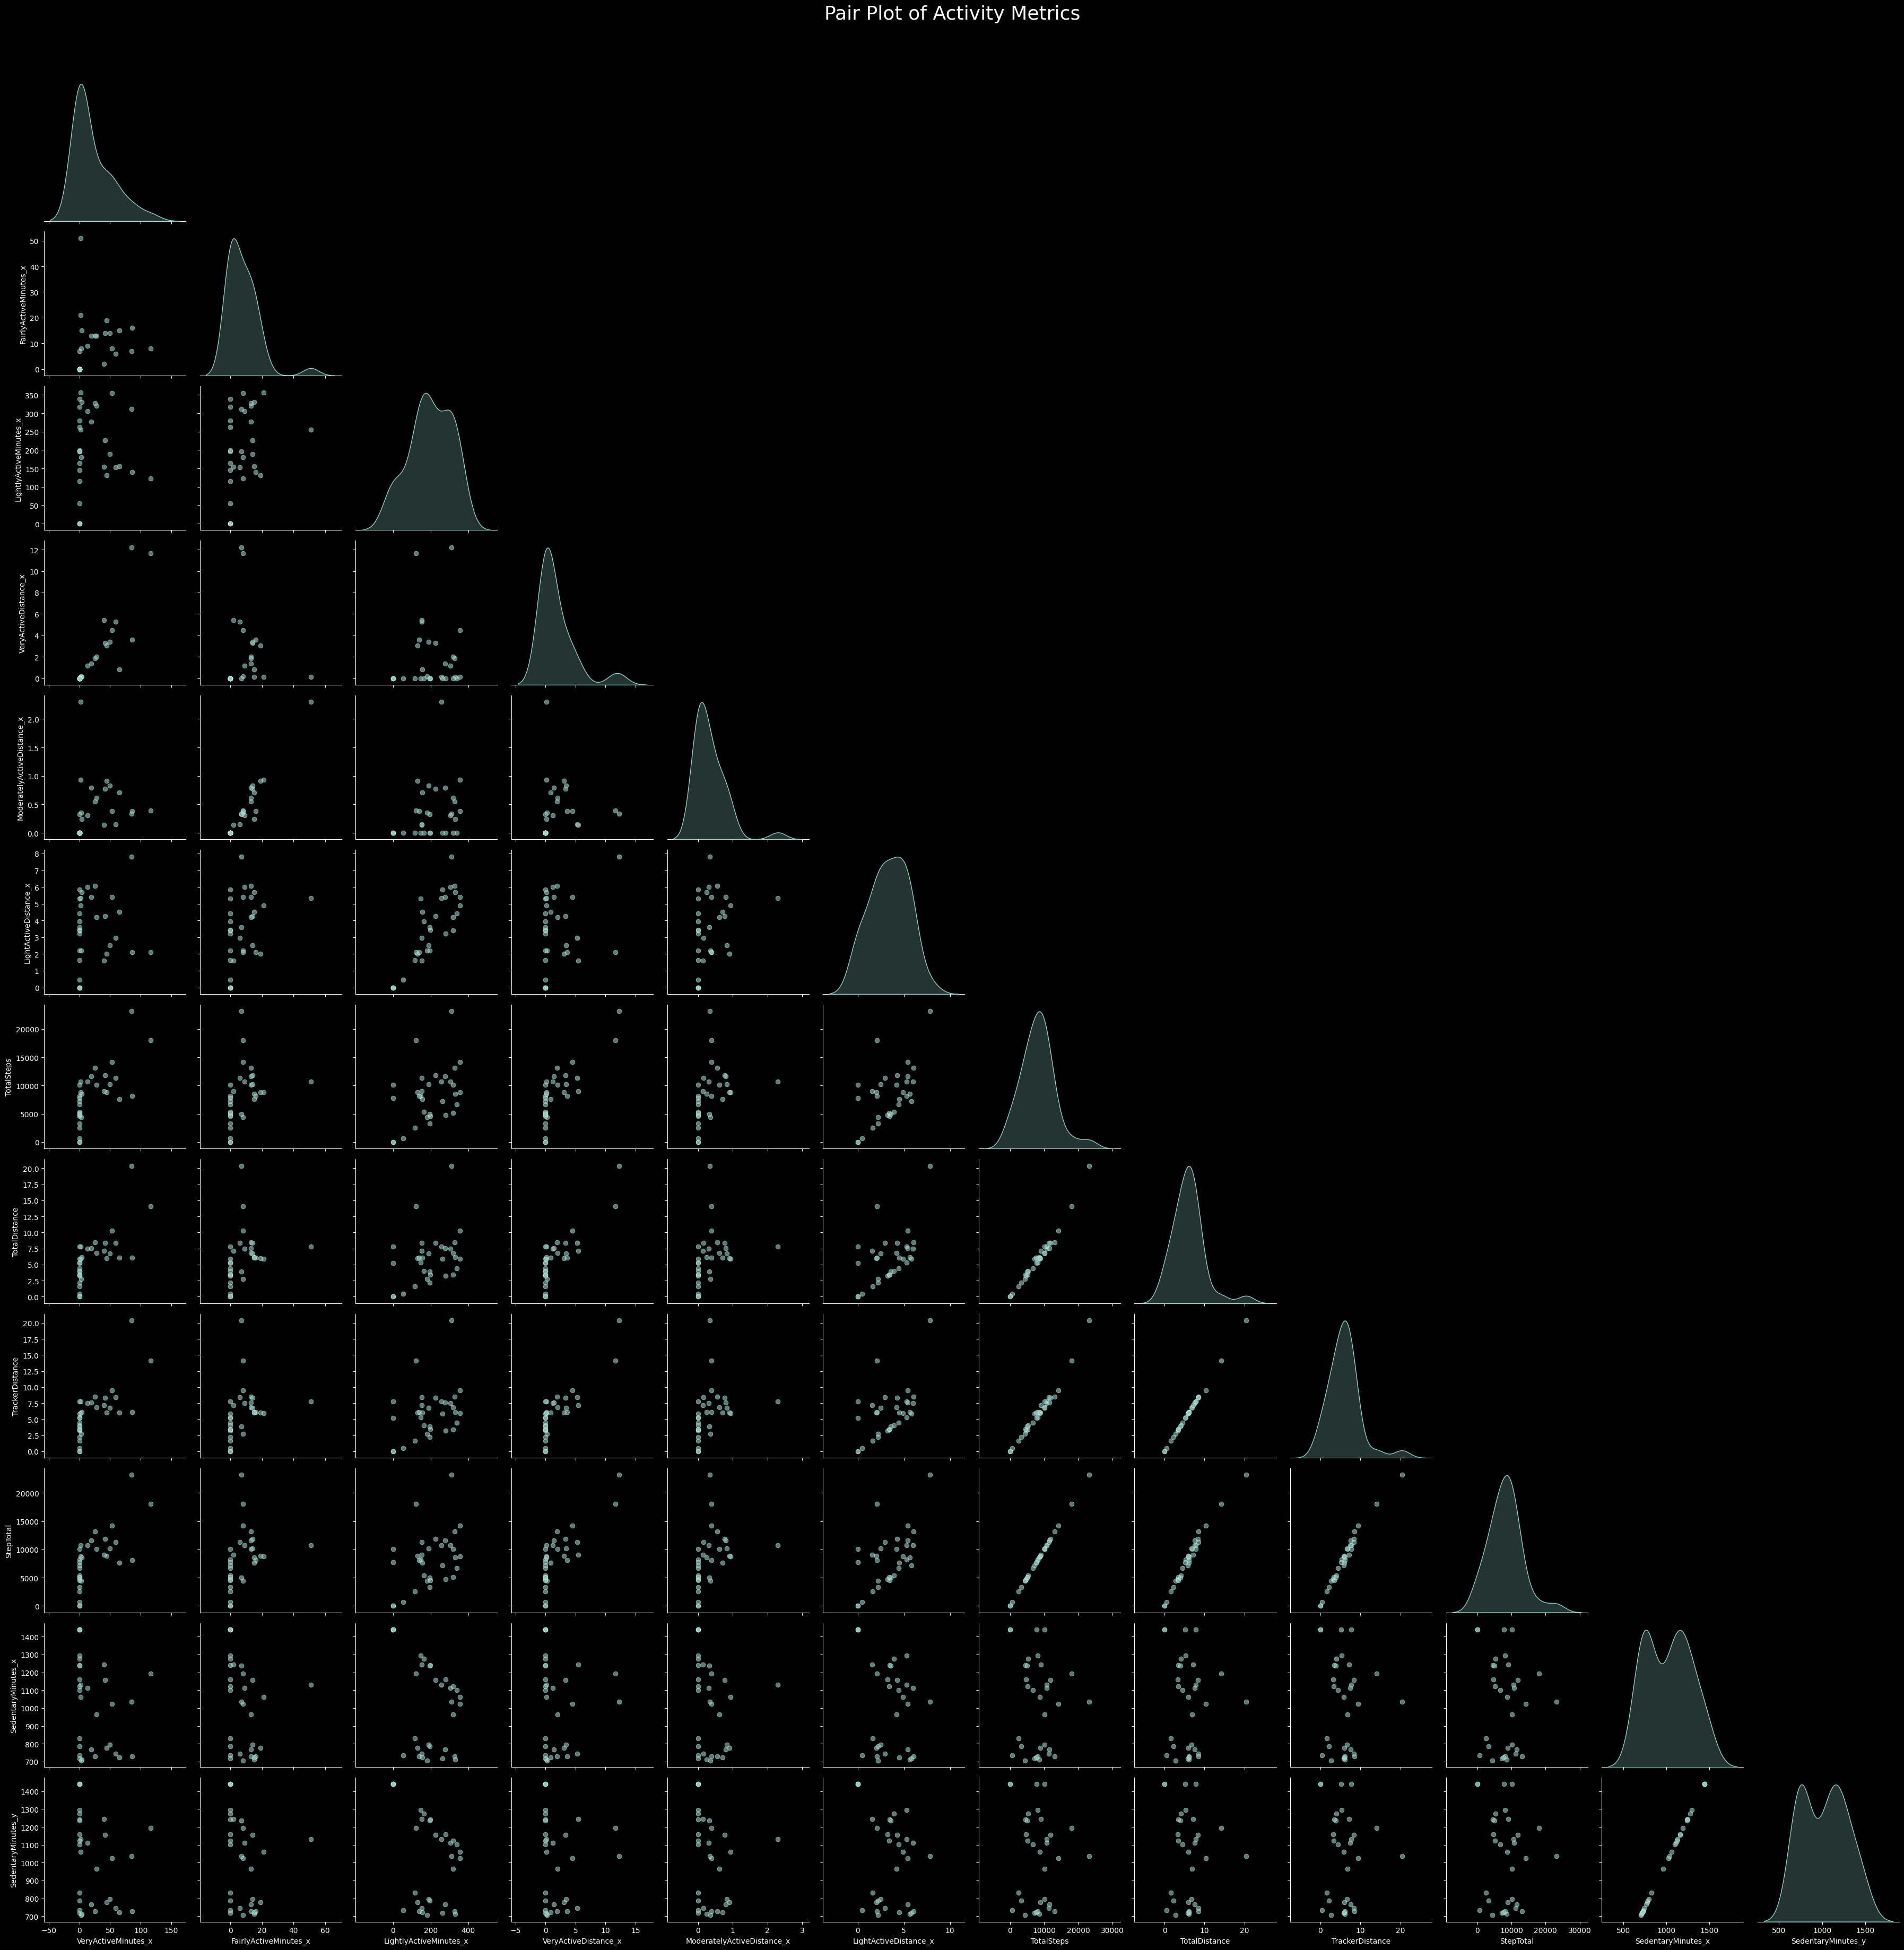

In [42]:
# Pair Plot visualization code
columns_to_include = [
    'VeryActiveMinutes_x','FairlyActiveMinutes_x','LightlyActiveMinutes_x','VeryActiveDistance_x',
    'ModeratelyActiveDistance_x','LightActiveDistance_x','TotalSteps','TotalDistance','TrackerDistance',
    'StepTotal','SedentaryMinutes_x','SedentaryMinutes_y'
]

# Filter the DataFrame using selected columns
md2 = md[columns_to_include]

# Plot the pair plot with controlled figure size (approx 4 plots per row)
sns.pairplot(md2, 
             corner=True, 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 40}, 
             height=3,     # Height of each subplot
             aspect=1)     # Width = height × aspect ratio

plt.suptitle("Pair Plot of Activity Metrics", y=1.02, fontsize=26)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is better for comparing various numerical variables in trend analysis style.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above pair plot:-

1) Every single variable when compared with itself is showing steady straight slant increasing line which shows consistency.
2) When variables are compared with each other they are showing depreciating trend after certain point.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The following are the suggestions for the business to improve and achieve their targets and solve business problems:-

1) The strava app can encourage people to track their distance as people are completing lot of steps per day but not logging in or tracking distance on app which ultimately will not generate fair manual report at the end of month.
2) Strava app can organize campaigns, seminars, webinars or rewarding system to encourage people join their app to achieve fitness targets, which ultimately will make people fit as well as increase profits for app.
3) Strava app can make a system if certain level of target is achieved by the user the user will get offer or discount on paid membership/ subscription, this will encourage people to stay fit and health and also help strava app to gain those extra premium users, ultimately increasing profits for the company.

# **Conclusion**

The following are the conclusion for the above analysis:-

1) There are 1004 rows and 6 duplicate rows.
2) There are 39 columns.
3) Removed 6 duplicate rows.
4) Replaced all the missing values in the columns with numerical value 0.
5) The Count total steps for the activity date is 8236.
6) The count of distance is 5 KM for the activity date.
7) Maximum Step count distribution is for ID 0 with 18% distribution.
8) Second highest is for ID 14172 with 9% distribution.
9) Count for sleep record is 33.
10) The highest correlation is between Total distance and Total steps with value of 0.98.
11) Second highest correlation is between moderately active distance _x and Fairly active minutes _x with value of 0.97.
12) Third highest correlation is between Very active distance _x and very active minutes_x with value of 0.88.

The above are summary or concluding points for the above data analysis.